In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import ndarray
from matplotlib.pyplot import subplots, show
from sklearn.model_selection import train_test_split

# model building imports
import keras
from keras import Model, Sequential, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import LeakyReLU
from keras.ops import add
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.losses import CategoricalCrossentropy
from keras.metrics import CategoricalAccuracy, AUC, F1Score
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler
from keras.utils import to_categorical

# augmentation operations
from keras.layers import RandomBrightness, RandomFlip, RandomRotation
from keras.layers import Pipeline


In [2]:
import tensorflow as tf

# List all physical GPUs
gpus = tf.config.list_physical_devices('GPU')
print("Available GPUs:", gpus)


Available GPUs: []


In [3]:
print('num gpus:', len(tf.config.list_physical_devices('GPU')))

num gpus: 0


In [4]:
# importing the dataset

metadata = pd.read_csv('../Data/rare_species/metadata.csv')

In [5]:
metadata

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...
...,...,...,...,...,...,...,...
11978,1fa96ea5-32fa-4a25-b8d2-fa99f6e2cb89,29734618,1011315,animalia,chordata,leporidae,chordata_leporidae/29734618_1011315_eol-full-s...
11979,628bf2b4-6ecc-4017-a8e6-4306849e0cfc,29972861,1056842,animalia,chordata,emydidae,chordata_emydidae/29972861_1056842_eol-full-si...
11980,0ecfdec9-b1cd-4d43-96fc-2f8889ec1ad9,30134195,52572074,animalia,chordata,dasyatidae,chordata_dasyatidae/30134195_52572074_eol-full...
11981,27fdb1e9-c5fb-459a-8b6a-6fb222b1c512,9474963,46559139,animalia,chordata,mustelidae,chordata_mustelidae/9474963_46559139_eol-full-...


In [6]:
# applying the filepath
metadata['file_path'] = metadata['file_path'].apply(lambda x: os.path.join('../Data/rare_species', x))

In [7]:
metadata

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,../Data/rare_species\mollusca_unionidae/128537...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,../Data/rare_species\chordata_geoemydidae/2096...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,../Data/rare_species\chordata_cryptobranchidae...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,../Data/rare_species\chordata_turdidae/2965853...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,../Data/rare_species\chordata_indriidae/212525...
...,...,...,...,...,...,...,...
11978,1fa96ea5-32fa-4a25-b8d2-fa99f6e2cb89,29734618,1011315,animalia,chordata,leporidae,../Data/rare_species\chordata_leporidae/297346...
11979,628bf2b4-6ecc-4017-a8e6-4306849e0cfc,29972861,1056842,animalia,chordata,emydidae,../Data/rare_species\chordata_emydidae/2997286...
11980,0ecfdec9-b1cd-4d43-96fc-2f8889ec1ad9,30134195,52572074,animalia,chordata,dasyatidae,../Data/rare_species\chordata_dasyatidae/30134...
11981,27fdb1e9-c5fb-459a-8b6a-6fb222b1c512,9474963,46559139,animalia,chordata,mustelidae,../Data/rare_species\chordata_mustelidae/94749...


In [8]:
print(metadata['family'].value_counts())

family
dactyloidae        300
cercopithecidae    300
formicidae         291
carcharhinidae     270
salamandridae      270
                  ... 
cyprinodontidae     30
alligatoridae       30
balaenidae          30
goodeidae           30
siluridae           29
Name: count, Length: 202, dtype: int64


In [9]:
metadata['target'] = metadata['family'].astype('category').cat.codes

In [10]:
# Spliting the data  80-20
Train , Test = train_test_split(metadata, test_size=0.2, random_state=42, stratify=metadata['target']) # stratify allows to split the data and keep the same distribuition of both train and test

In [12]:
num_classes = metadata['family'].nunique()
num_classes

202

In [42]:
input_shape = (256, 256, 3)

In [ ]:
import keras
import numpy as np

def load_image(df, path='file_path', label='target', image_size=(256, 256)):
    X = []
    y = []

    for _, row in df.iterrows():
        image = keras.utils.load_img(row[path], target_size=image_size)
        input_arr = keras.utils.img_to_array(image) / 255.0  # Normalize
        X.append(input_arr)
        y.append(row[label])
    
    return np.array(X), np.array(y)
        


X_train , y_train = load_image(Train)
X_test , y_test = load_image(Test)

c:\Users\ruben\.conda\envs\DeepLearning2425\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (115600000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [15]:
load_image(Train)

c:\Users\ruben\.conda\envs\DeepLearning2425\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (115600000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


(array([[[[0.5294118 , 0.54901963, 0.5254902 ],
          [0.5058824 , 0.5254902 , 0.5019608 ],
          [0.4745098 , 0.49411765, 0.47058824],
          ...,
          [0.49803922, 0.5019608 , 0.48235294],
          [0.5058824 , 0.50980395, 0.49019608],
          [0.49803922, 0.5019608 , 0.48235294]],
 
         [[0.49803922, 0.5176471 , 0.49411765],
          [0.47058824, 0.49019608, 0.46666667],
          [0.5411765 , 0.56078434, 0.54509807],
          ...,
          [0.49019608, 0.5176471 , 0.4862745 ],
          [0.5176471 , 0.5254902 , 0.48235294],
          [0.49803922, 0.5058824 , 0.4627451 ]],
 
         [[0.52156866, 0.5411765 , 0.5137255 ],
          [0.54901963, 0.5686275 , 0.5411765 ],
          [0.42352942, 0.44313726, 0.41960785],
          ...,
          [0.5529412 , 0.5372549 , 0.5411765 ],
          [0.52156866, 0.5254902 , 0.5058824 ],
          [0.5019608 , 0.5058824 , 0.4862745 ]],
 
         ...,
 
         [[0.6039216 , 0.6627451 , 0.7529412 ],
          [0.62745

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9586, 256, 256, 3), (9586,), (2397, 256, 256, 3), (2397,))

In [43]:
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

(n_samples, size, size, rgb)

In [44]:
keras.utils.image_dataset_from_directory??

Signature:
keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbo

In [45]:
def show_image(array: ndarray) -> None:
    """
    Prints image encoded as a numpy array (uint8)
    """

    figure, axis = subplots(frameon=False)
    axis.imshow(array, aspect="equal")
    axis.set_axis_off()
    show()

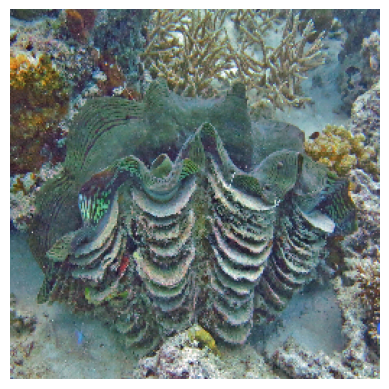

In [46]:
# Show example
train_idx = 1000
train_example = X_train[train_idx]
show_image(train_example)

In [47]:
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
# def normalize(array: ndarray) -> ndarray:
#     """
#     Converts the type of an ndarray to float32 and normalizes over the pixel
#     range of values
#     """

#     return array.astype("float32") / 255.0

In [49]:
model = Sequential(
    [
        Input(shape=input_shape),
        Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(num_classes, activation="softmax"),
    ],
    name="Teste",
)

model.summary()
    

Model: "Teste"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 202)            │    26,476,746 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,569,994 (101.36 MB)

 Trainable params: 26,569,994 (101.36 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model = model
optimizer = SGD(learning_rate=0.01, name="optimizer")
loss = CategoricalCrossentropy(name="loss")

# metrics
categorical_accuracy = CategoricalAccuracy(name="accuracy")
auc = AUC(name="auc")
f1_score = F1Score(average="macro", name="f1_score")
metrics = [categorical_accuracy, auc, f1_score]

# traces the computation
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [51]:
batch_size = 32
epochs = 10

In [53]:
# train the model
_ = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2
)

MemoryError: Unable to allocate 5.62 GiB for an array with shape (7668, 256, 256, 3) and data type float32

In [ ]:
# evaluate on the test set
model.evaluate(
    X_test,
    y_test,
    batch_size=batch_size,
    return_dict=True,
    verbose=0
)